# Essais de Reading various Obs data files

Reading various Observations source files:

- `'OBS'`, Obs file used by Constantin, it seems to me it is the v4 of HadCRUT observations data. Values are already shifted in reference of the mean at pre-industrial period 1850-1900.
- `'HadCRUT'`, Temperature observations provided by Met Office Hadley Centre / Climatic Research Unit, University of East Anglia. Data present in file is the global/anual mean of the temoerature anomaly.  Source values are the 2m air temperature over land blended with sea water temperature at a depth of 20cm expressed as monthly anomalies relative to 1961-1990 climatology.
- `'HadCRUT(shifted)'`, Same as precedent with values shifted in reference of the mean at pre-industrial period 1850-1900 of `'HadCRUT'` data.
- `'HadCRUT200'`, Individual temperature observations ....
- `'HadCRUT+AR1'`, Temperature observations ....


Notebook = `Essais_reading_various_obs_cm-v1.ipynb`

#### Historic:

> **Original version**<br/>
> C.Mejia, LOCEAN, Jan 2023

In [1]:
#from climaf.api import *

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

from scipy import signal

#clog('critical') 

In [2]:
import generic_tools as gt   # like hexcolor(), ...

In [3]:
# Call set_printoptions(threshold=x) to change the threshold where arrays are truncated. To prevent truncation, set the threshold to np.inf.
# Change linewidth to print wider lines ...
#display(np.get_printoptions())
if False:
    np.set_printoptions(threshold=np.inf,linewidth=180) # good for a 1920 pixels wide screen
    pd.set_option('display.max_columns', 18)            #
else:
    #np.set_printoptions(threshold=np.inf,linewidth=240)   # good for an iMac 27" screen
    #pd.set_option('display.max_columns', 24)              #
    np.set_printoptions(threshold=np.inf,linewidth=300)   # good for an iMac 27" screen
    pd.set_option('display.max_columns', 30)              #

#pd.set_option('display.max_columns', 100)             # (this is maybe too much!)

#--------------------
save_figs = True
#save_figs = False
#--------------------
figs_dir = 'Figs'

local_nb_label = "NbX_reading_various_obs-v1"   # label a appliquer aux noms des fichiers (figures) produits dans le notebook

fig_ext = 'png'
figs_defaults = { 'dpi' : 300, 'facecolor':'w', 'edgecolor' : 'w', 'format':fig_ext} # ajuter format='png' ou autre a l'appel de savefig()

if save_figs and not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [4]:
data_dir='../../constantin_data/data_source'

obs_filename = 'obs.npy'
hadcrut_filename = 'HadCRUT/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc'
hadcrut_multi_filename = 'HadCRUT/HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc'

In [5]:
!ls -l ../../constantin_data/data_source/HadCRUT

total 5904
-rw-r--r--  1 carlos  Lodyc  2950876  2 déc 10:38 HadCRUT.5.0.1.0.analysis.ensemble_series.global.monthly.nc
-rw-r--r--  1 carlos  Lodyc    34720  2 déc 10:26 HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc
-rw-r--r--  1 carlos  Lodyc    22212 15 fév 17:10 T_OBSv5_month_ens_da.v2.p
-rw-r--r--  1 carlos  Lodyc     5329 15 fév 17:10 T_OBSv5_year_mean_da.v2.p


___
## _Load OBS (Observations used by Constantin, I think those are from HadCRUT version 4)_

OBS global & annual mean data


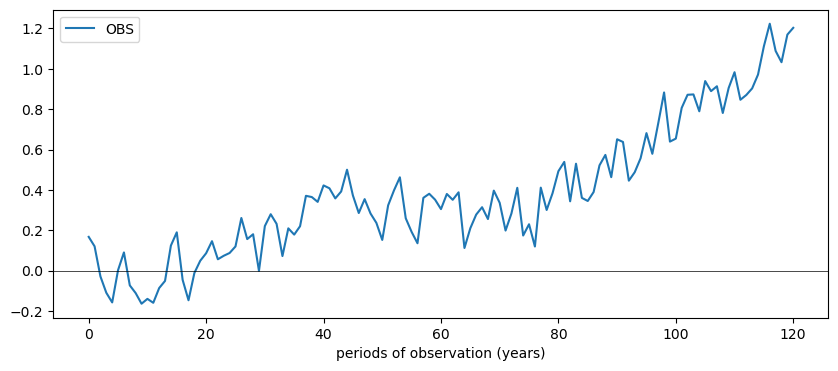

In [6]:
print("OBS global & annual mean data")
obs_arr = np.load(os.path.join(data_dir,obs_filename))

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,4))
ax.plot(obs_arr, label='OBS')
# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 
obs_arr.shape
ax.set_xlabel('periods of observation (years)')
ax.legend(loc=2)

___
## _Load HadCRUT (Met Office Hadley Centre / Climatic Research Unit, University of East Anglia) Version 5 - Global & Annual mean_

HadCRUT v5 global & annual mean data
Last time step: 2022-07-02T12:00:00.000000000


<xarray.Dataset>
Dimensions:           (time: 173, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-07-02T12:00:00 ... 2022-07-0...
    latitude          float64 ...
    longitude         float64 ...
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (bnds) float64 ...
    longitude_bnds    (bnds) float64 ...
    realization_bnds  (bnds) int64 ...
    tas_lower         (time) float64 ...
    tas_upper         (time) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-11-24T16:34:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

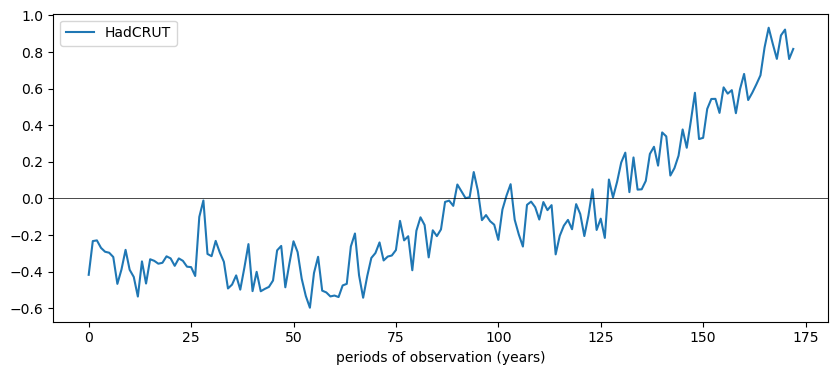

In [7]:
print("HadCRUT v5 global & annual mean data")
hadcrut_ds = xr.open_dataset(os.path.join(data_dir,hadcrut_filename))

print(f"Last time step: {hadcrut_ds['time'].isel(time=-1).values}")
display(hadcrut_ds)

# extraction de l'array de données qui nous interesent: les moyennes des anomalies de temperature, `tas_mean`
hadcrut_obs_arr = hadcrut_ds['tas_mean'].values

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,4))
ax.plot(hadcrut_obs_arr, label='HadCRUT');
# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 
obs_arr.shape
ax.set_xlabel('periods of observation (years)')
ax.legend(loc=2)

___
## _Load HadCRUT v.5 - Multiple monthly series_

HadCRUT v5 Multiple monthly series data
Last time step: 2022-10-16T12:00:00.000000000


<xarray.Dataset>
Dimensions:         (realization: 200, time: 2074, bnds: 2)
Coordinates:
  * realization     (realization) int64 1 2 3 4 5 6 ... 195 196 197 198 199 200
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2022-10-16T...
    latitude        float64 ...
    longitude       float64 ...
Dimensions without coordinates: bnds
Data variables:
    tas             (realization, time) float64 -0.6481 -0.1987 ... 0.9389
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (bnds) float64 ...
    longitude_bnds  (bnds) float64 ...
    coverage_unc    (time) float64 ...
    area_fraction   (time) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-11-24T16:34:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

Text(0.5, 0, 'periods of observation (months)')

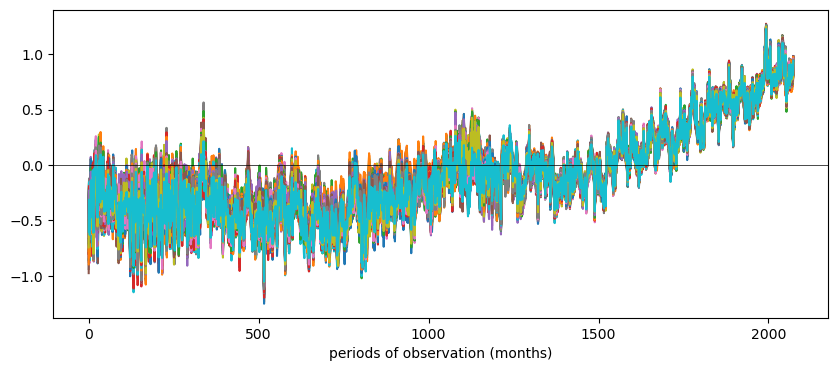

In [8]:
print("HadCRUT v5 Multiple monthly series data")
hadcrutm_ds = xr.open_dataset(os.path.join(data_dir,hadcrut_multi_filename))

print(f"Last time step: {hadcrutm_ds['time'].isel(time=-1).values}")

# extraction de l'array de données qui nous interesent: les moyennes des anomalies de temperature, `tas_mean`
hadcrutm__obs_Tarr = hadcrutm_ds['tas'].values.T

display(hadcrutm_ds)

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,4))
ax.plot(hadcrutm__obs_Tarr, label='HadCRUT200');
# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 
obs_arr.shape
ax.set_xlabel('periods of observation (months)')
#ax.legend(loc=2)

___
## _Load HadCRUT + AR1 random series_

For HadCRUT+AR1:
 1- first loading HadCRUT as base ...
 NetCDF has values from  2022. Keeping data until: 2014 (i.e: 2014-07-02T12:00:00.000000000)
obs_label obs_arr: (115,)
Obs HadCRUT array shape: (1, 115)
    115 years: from 1900 to 2014
 2- low-pass filtering this base Obs profile ...
 3- loading the AR1 noisy generated vectors from file T_pi/T_AR1.generate_R100xL115.v2.p ...
'HadCRUT+AR1' data time from: 1900 to  2014 - obs_arr shape: (100, 115)
Saving figure in file Figs/Building_HadCRUT+AR1{n_gen_ar1}_profiles_data.png-1.06-rescaled.png ...


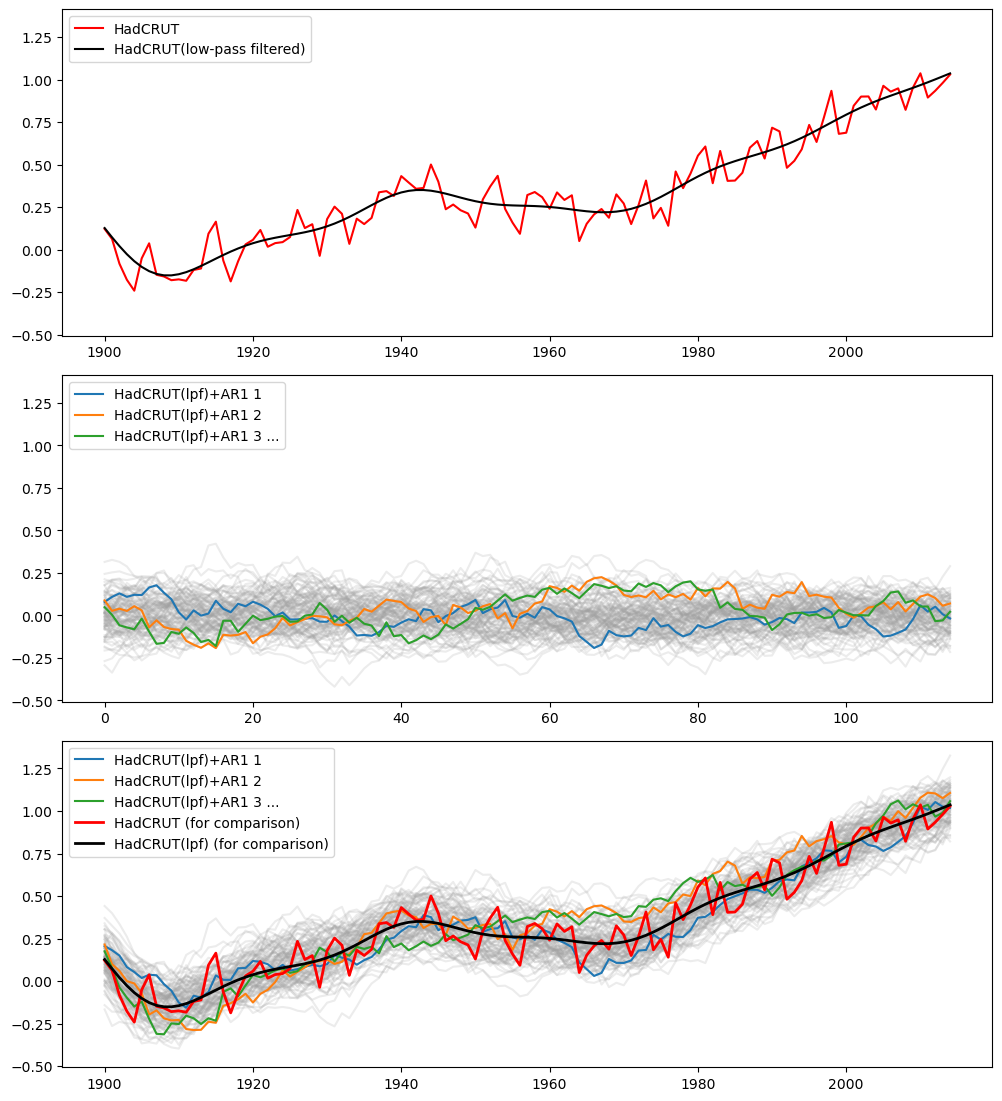

In [36]:
# Steps inside load_obs_data() when loading 'HadCRUT+AR1' data
# Here we build it step by step: loading first 'HadCRUT', low-pass filtering it, and adding the AR1 random vectors preaviously computed

obs_label = 'HadCRUT+AR1'
n_gen_ar1 = 100
first_year = 1900
last_year = 2014
lp_obs_filtering_dic = { 'n':4, 'Wn':[1./10.], 'btype':'lowpass' }
obs_ar1_filename = ['T_pi/T_AR1.generate_R','xL', '.v2.p']  # The three parts of a file named for instance 'T_pi/T_AR1.generate_R100xL115.v2.p', for n=100, sz=115

nrows = 3
ncols = 1

bottom = 0.05; top    = 0.97
left   = 0.05; right  = 0.98
wspace = 0.02; hspace = 0.12

fig,(ax1,ax2,ax3) = plt.subplots(nrows=nrows,ncols=ncols,sharex=False,sharey=True,figsize=(5*max(2,ncols),1+3.5*nrows),
                                 gridspec_kw={'hspace': hspace, 'wspace' : wspace, 
                                              'left'  : left,   'right'  : right,
                                              'top'   : top,    'bottom' : bottom })

print(f"For {obs_label}:\n 1- first loading HadCRUT as base ...")

obs_base_df = gt.load_obs_data(obs_label='HadCRUT', return_as_df=True, limit_years=True,
                       first_year=first_year, last_year=last_year,
                       preindustrial_mean_shift_flg=True,
                       obs_scale_flg=False,
                       verbose=False)

hadcrut_preindustrial_mean_shift_flg = False   # to avoid extra shifting

print(f" 2- low-pass filtering this base Obs profile ...")

obs_df = gt.filter_forcing_df(obs_base_df, filt_dic=lp_obs_filtering_dic, verbose=False)

# AX1 plot 1
obs_base_df.T['HadCRUT'].plot(ax=ax1,c='r',label='HadCRUT')
# AX1 plot 2 (filtered signal)
obs_df.T['HadCRUT'].plot(ax=ax1,c='k',label='HadCRUT(low-pass filtered)')
ax1.legend(loc=2)

nyears = last_year - first_year + 1
ar1_obs_filename = f"{obs_ar1_filename[0]}{n_gen_ar1}{obs_ar1_filename[1]}{nyears}{obs_ar1_filename[2]}"

print(f" 3- loading the AR1 noisy generated vectors from file {ar1_obs_filename} ...")

if not os.path.isfile(os.path.join(data_dir,ar1_obs_filename)) :
    print(f"\n *** load_obs_data error: AR1 OBS file '{ar1_obs_filename}' not found ***\n")
    raise Exception(f"\n *** load_obs_data error: AR1 OBS file '{ar1_obs_filename}' not found ***\n")

ar1_obs_arr = pickle.load( open( os.path.join(data_dir, ar1_obs_filename), "rb" ) )

# AX2 plot: AR1 random vectors array
ax2.plot(ar1_obs_arr.T,c='#a0a0a0',alpha=0.2,label=None)
h2=ax2.plot(ar1_obs_arr[:3,:].T,label=['HadCRUT(lpf)+AR1 1','HadCRUT(lpf)+AR1 2','HadCRUT(lpf)+AR1 3 ...'])
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=labels, loc=2)
#ax2.legend(['AR1 random vectors array 1','AR1 random vectors array 2','AR1 random vectors array 3 ...'],handles=h2,loc=2)

obs_arr = obs_df.values + ar1_obs_arr
obs_years = obs_df.columns.values
out_label = obs_label


# AX3 plot: AR1 random vectors array
ax3.plot(obs_years,obs_arr.T,c='#a0a0a0',alpha=0.2,label=None)
h3a=ax3.plot(obs_years,obs_arr[:3,:].T,label=['HadCRUT(lpf)+AR1 1','HadCRUT(lpf)+AR1 2','HadCRUT(lpf)+AR1 3 ...'])
h3b=obs_base_df.T['HadCRUT'].plot(ax=ax3,lw=2,c='r',label='HadCRUT (for comparison)')
# AX1 plot 2 (filtered signal)
h3c=obs_df.T['HadCRUT'].plot(ax=ax3,lw=2,c='k',label='HadCRUT(lpf) (for comparison)')

handles, labels = ax3.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc=2)

print(f"'{obs_label}' data time from: {obs_years[0]} to  {obs_years[-1]} - obs_arr shape: {obs_arr.shape}")
#display(obs_ds)

figs_filename = os.path.join(figs_dir, 'Building_HadCRUT+AR1{n_gen_ar1}_profiles_data'+'.'+fig_ext)
if obs_scale_flg :
    figs_filename +=  "-1.06-rescaled"
else:
    figs_filename +=  "-no-rescaled"
figs_filename += '.'+fig_ext

print(f"Saving figure in file {figs_filename} ...")
plt.savefig(figs_filename, **figs_defaults)

# Loading Obs using `gt.load_obs_data()`

In [10]:
#obs_scale_flg = False
obs_scale_flg = True

#obs_df = gt.load_obs_data(obs_label='OBS', data_dir=data_dir, last_year=2020, return_as_df=True, verbose=True)
obs_df = gt.load_obs_data(obs_label='OBS', return_as_df=True, limit_years=False, obs_scale_flg=obs_scale_flg, verbose=False)
display(obs_df)

hadcrut_df = gt.load_obs_data(obs_label='HadCRUT', return_as_df=True, limit_years=False, preindustrial_mean_shift_flg=False,
                              obs_scale_flg=obs_scale_flg, verbose=False)   # last_year=None --> prends le derniere annee dans les donnees en tant que last_year
display(hadcrut_df)

hadcrutshift_df = gt.load_obs_data(obs_label='HadCRUT', return_as_df=True, limit_years=False, preindustrial_mean_shift_flg=True,
                                   obs_scale_flg=obs_scale_flg, verbose=False)   # last_year=None --> prends le derniere annee dans les donnees en tant que last_year
hadcrutshift_df.rename({ 'HadCRUT':'HadCRUT-shifted' }, inplace=True)
display(hadcrutshift_df)

hadcrut200shift_df = gt.load_obs_data(obs_label='HadCRUT200', return_as_df=True, limit_years=False, preindustrial_mean_shift_flg=True,
                                      obs_scale_flg=obs_scale_flg, verbose=False)   # last_year=None --> prends le derniere annee dans les donnees en tant que last_year
display(hadcrut200shift_df)

# essai de lecture de 'HadCRUT+AR1'
first_year=1900
last_year=2014
n_gen_ar1 = 100
hadcrut_preindustrial_mean_shift_flg=True
hadcrutAR1shift_df = gt.load_obs_data(obs_label='HadCRUT+AR1', return_as_df=True, limit_years=True, first_year=first_year, last_year=last_year,
                                      preindustrial_mean_shift_flg=hadcrut_preindustrial_mean_shift_flg,
                                      n_gen_ar1=n_gen_ar1, obs_scale_flg=True, verbose=False)
display(hadcrutAR1shift_df)


obs_label obs_arr: (121,)
Obs OBS array shape: (1, 121)
    121 years: from 1900 to 2020
Scaling Obs data by the factor of 1.06


,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
OBS,0.177214,0.12772,-0.030765,-0.116439,-0.167172,0.0026,0.095446,-0.077626,-0.118182,-0.173988,-0.148486,-0.169142,-0.09184,-0.054271,0.131498,...,0.9428,0.968387,0.827962,0.959396,1.042147,0.897446,0.922355,0.957156,1.029756,1.178471,1.296908,1.153842,1.094675,1.239665,1.275329


 NetCDF has values from  2022. Keeping data until: 2014 (i.e: 2022-07-02T12:00:00.000000000)
obs_label obs_arr: (173,)
Obs HadCRUT array shape: (1, 173)
    173 years: from 1850 to 2022
Scaling Obs data by the factor of 1.06


,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
HadCRUT,-0.442718,-0.247351,-0.243163,-0.286576,-0.309128,-0.314768,-0.339575,-0.495264,-0.412092,-0.298067,-0.413575,-0.455034,-0.568582,-0.365004,-0.493363,...,0.493589,0.632589,0.721194,0.56996,0.612264,0.66099,0.713244,0.874621,0.988903,0.895885,0.808413,0.944537,0.978161,0.807567,0.865988


 NetCDF has values from  2022. Keeping data until: 2014 (i.e: 2022-07-02T12:00:00.000000000)
obs_label obs_arr: (173,)
Obs HadCRUT array shape: (1, 173)
    173 years: from 1850 to 2022
Scaling Obs data by the factor of 1.06


,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
HadCRUT-shifted,-0.064826,0.130542,0.134729,0.091317,0.068764,0.063124,0.038317,-0.117372,-0.034199,0.079825,-0.035683,-0.077141,-0.190689,0.012889,-0.115471,...,0.871481,1.010481,1.099086,0.947852,0.990156,1.038882,1.091136,1.252514,1.366795,1.273777,1.186306,1.322429,1.356054,1.18546,1.24388


 NetCDF has values from  2022. Keeping data until: 2014 (i.e: 2022)
obs_label obs_arr: (200, 173)
Obs HadCRUT200 array shape: (200, 173)
    173 years: from 1850 to 2022
Scaling Obs data by the factor of 1.06


,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.020522,0.270549,0.293080,0.180740,0.069075,0.117333,0.046123,-0.009853,0.088303,0.158492,-0.083566,-0.028086,-0.241236,-0.035506,-0.079226,...,0.888093,1.039336,1.114358,0.973298,0.989591,1.040193,1.128730,1.293204,1.405789,1.305156,1.198706,1.346897,1.367692,1.203609,1.247615
1,-0.044920,0.192050,0.109090,0.017212,0.100451,0.055287,-0.005755,-0.125991,-0.049900,0.131250,-0.048843,0.011302,-0.198975,-0.046464,0.013522,...,0.864089,1.021098,1.096275,0.952193,0.976783,1.032840,1.094266,1.258921,1.337956,1.289106,1.178471,1.315869,1.355128,1.206478,1.229803
2,-0.106264,0.139285,0.090835,0.034354,0.170903,0.115523,-0.037462,-0.152879,-0.075947,0.001721,-0.138909,-0.076250,-0.135721,0.022810,-0.228922,...,0.870063,1.032788,1.102378,0.964586,0.990638,1.053430,1.081207,1.269678,1.367493,1.287527,1.181308,1.311823,1.355232,1.185232,1.258767
3,-0.156419,0.119937,0.023756,0.091576,-0.027321,0.010430,-0.045459,-0.175405,0.049191,0.001575,-0.090105,-0.061421,-0.161400,0.028787,-0.180288,...,0.854441,0.991347,1.099618,0.929400,0.986984,1.023075,1.073324,1.237109,1.374494,1.254960,1.188591,1.329726,1.347310,1.190852,1.249139
4,-0.080231,0.100121,0.126245,0.081662,0.037440,0.070292,0.091673,-0.066374,-0.017762,0.098964,-0.069740,-0.100107,-0.251865,-0.021590,-0.131583,...,0.884443,0.986720,1.104391,0.939158,0.975868,1.021833,1.093831,1.250212,1.363967,1.268506,1.176321,1.324564,1.353388,1.206456,1.262490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.054873,0.183058,0.249863,0.123219,0.049626,0.225849,0.092450,-0.028405,0.017268,0.102104,-0.010548,-0.059546,-0.132574,0.050244,-0.130907,...,0.856917,0.986915,1.056876,0.910107,0.953159,1.016152,1.071807,1.229764,1.355047,1.268414,1.171585,1.301548,1.339391,1.154670,1.213732
196,-0.074890,0.177080,0.193018,0.008549,0.112708,-0.008138,0.097791,-0.075674,-0.092965,-0.017717,0.010966,-0.007358,-0.218160,-0.040854,0.022768,...,0.865262,1.022892,1.128767,0.947768,0.985255,1.039598,1.072685,1.274935,1.387435,1.272956,1.196966,1.314735,1.359203,1.217635,1.256715
197,-0.113538,0.040452,0.214666,0.093623,0.030267,0.039907,0.106805,-0.188666,-0.031812,0.001583,-0.050338,-0.105782,-0.206853,0.016178,-0.155320,...,0.887397,1.006185,1.106493,0.949595,1.010504,1.027582,1.090972,1.282556,1.398971,1.273904,1.203188,1.305624,1.342161,1.196615,1.250678
198,-0.112390,0.049321,0.148776,0.077924,0.069060,0.068463,0.030651,-0.117907,0.025125,0.066580,-0.051470,-0.043440,-0.172447,-0.004824,-0.135015,...,0.883820,1.022022,1.122094,0.956919,0.995097,1.053572,1.068079,1.252209,1.383030,1.270899,1.203648,1.331132,1.333122,1.181020,1.244516


 NetCDF has values from  2022. Keeping data until: 2014 (i.e: 2014-07-02T12:00:00.000000000)
obs_label obs_arr: (115,)
Obs HadCRUT array shape: (1, 115)
    115 years: from 1900 to 2014
Obs HadCRUT+AR1 array shape: (100, 115)
    115 years: from 1900 to 2014
Scaling Obs data by the factor of 1.06


,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0.218692,0.192448,0.159364,0.087519,0.056689,0.019548,0.040106,0.036484,-0.018466,-0.059112,-0.133799,-0.165441,-0.090825,-0.102808,-0.067382,...,0.775198,0.863758,0.880427,0.848030,0.838887,0.811447,0.833574,0.867796,0.904531,0.984977,1.088200,1.066845,1.115933,1.087068,1.079317
1,0.228305,0.105511,0.063947,-0.000357,-0.014243,-0.075628,-0.208146,-0.181934,-0.231834,-0.244938,-0.241923,-0.298353,-0.304699,-0.303195,-0.252887,...,0.851868,0.849980,0.899100,0.954999,0.981644,1.025114,0.997629,1.058861,1.016899,1.080056,1.142677,1.174306,1.169716,1.140033,1.172599
2,0.186078,0.080964,-0.039411,-0.103042,-0.158061,-0.127397,-0.234869,-0.328200,-0.331150,-0.263092,-0.267550,-0.215056,-0.231385,-0.267091,-0.231594,...,0.858190,0.865081,0.887289,0.905686,0.983893,1.032301,1.102095,1.125384,1.070669,1.102322,1.081290,1.098409,1.025282,1.048614,1.121488
3,0.247558,0.158818,-0.001677,0.028905,-0.034413,-0.113754,-0.148281,-0.149062,-0.127374,-0.074919,-0.048947,-0.037847,-0.055201,-0.074289,-0.041100,...,1.011648,0.968582,1.020459,0.994895,1.078580,1.096676,1.086483,1.110251,1.116045,1.187287,1.207972,1.187447,1.228238,1.242236,1.270103
4,0.235729,0.296568,0.248051,0.192006,0.156870,0.138354,0.108967,0.082102,0.019946,-0.035636,0.056283,0.081477,0.056614,0.091071,0.145740,...,0.810313,0.794711,0.823421,0.851014,0.899563,0.895512,0.904822,0.940706,1.012851,0.985371,0.929098,0.947333,1.012497,1.057230,1.034704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.182110,0.118958,0.038915,0.028943,0.002803,0.001821,-0.052714,-0.087242,-0.090654,-0.072623,-0.086322,-0.116823,-0.149622,-0.181287,-0.113326,...,0.993426,1.032382,1.019095,1.056139,1.049357,1.152560,1.106346,1.119696,1.094312,1.140992,1.247561,1.277749,1.235924,1.217417,1.204970
96,0.169313,0.108366,0.114043,0.093754,-0.050775,-0.053339,-0.099270,-0.127594,-0.075342,-0.047568,-0.014447,-0.002524,0.000261,0.035249,0.053881,...,0.843078,0.900030,0.915823,0.956211,0.959044,1.015104,0.993582,0.916677,0.895446,0.879748,0.940534,1.006546,1.022537,0.982211,0.993023
97,0.117477,-0.038246,-0.073920,-0.109630,-0.162153,-0.174194,-0.192541,-0.172230,-0.157663,-0.085428,-0.043896,0.009732,-0.006638,0.018476,-0.000689,...,0.975857,0.934888,0.846146,0.931795,0.999395,0.947604,0.884596,0.924595,0.906906,0.866421,0.838673,0.884093,0.861002,0.947784,0.998873
98,0.125322,0.041702,0.077228,0.061594,0.020895,-0.013433,-0.017662,-0.002538,-0.035538,-0.019756,-0.070790,-0.146458,-0.120402,-0.165109,-0.178705,...,1.038321,1.015335,1.033710,1.086308,1.112785,1.084256,1.067939,1.093971,1.090782,1.117382,1.146224,1.195699,1.201363,1.188891,1.154322


Saving figure in file Figs/OBS_and_HadCRUT_raw_data-1.06-rescaled.png ...


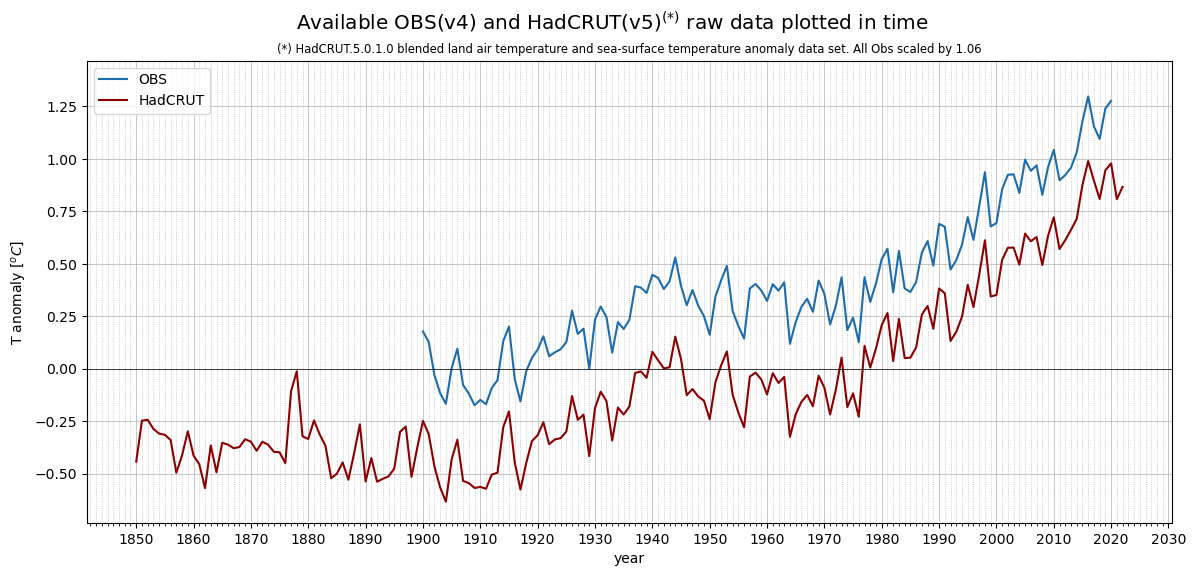

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#y_lim = None
y_lim = [-0.7334256252308086, 1.4668055534648712]
figsize=(14,6)

#obs_color = '#b22222'; hadcrut_col = '#228b22'
#obs_color = [0.114,0.423,0.671,1]; hadcrut_col = [1.0,0.482,0.106,1]
obs_color = [0.114,0.423,0.671,1]; hadcrut_col = '#8b0000'

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=figsize)
obs_df.transpose().plot(ax=ax, c=obs_color)
hadcrut_df.transpose().plot(ax=ax, c=hadcrut_col)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(True, which='major', linestyle='-', linewidth=0.5) #{'major', 'minor', 'both'})
ax.grid(True, which='minor', linestyle=':', linewidth=0.5) #{'major', 'minor', 'both'})

# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 

sub_title_lbl = f"(*) {hadcrut_ds.attrs['title']}"
if obs_scale_flg :
    sub_title_lbl += ". All Obs scaled by 1.06"
title_lbl = "Available OBS(v4) and HadCRUT(v5)$^{(*)}$ raw data plotted in time"

ax.set_title(sub_title_lbl,fontsize='small')#,horizontalalignment='left',x=0.01)
plt.suptitle(title_lbl,y=0.965,size="x-large")

ax.set_xlabel('year')
ax.set_ylabel('T anomaly [$^oC$]')

if y_lim is not None :
    ax.set_ylim(y_lim)

#print('YLim:',ax.get_ylim())
# YLim: (-0.6886144006008413, 1.3145509254647352)
# YLim: (-0.7299312646368918, 1.3934239809926194)

figs_filename = os.path.join(figs_dir, 'OBS_and_HadCRUT_raw_data')
if obs_scale_flg :
    figs_filename +=  "-1.06-rescaled"
else:
    figs_filename +=  "-no-rescaled"
figs_filename += '.'+fig_ext

print(f"Saving figure in file {figs_filename} ...")
plt.savefig(figs_filename, **figs_defaults)

In [12]:
hadcrutT_df = hadcrut_df.transpose()
hadcrutshiftT_df = hadcrutshift_df.transpose()

preindustrial_lapse = [1850,1900]

# adding shifted data, shifting based on pre-industrial mean
hadcrut_mean_preindustrial = hadcrut_df.transpose().loc[np.arange(preindustrial_lapse[0],preindustrial_lapse[1])].mean().values
print(f"Decalage de la serie 'HadCRUT' par {hadcrut_mean_preindustrial}")
#hadcrutT_df['HadCRUT-shifted'] = hadcrutT_df['HadCRUT'] - hadcrut_mean_preindustrial
#hadcrutT_df

Decalage de la serie 'HadCRUT' par [-0.38047919]


YLim: (-0.7334256252308086, 1.4668055534648712)
Saving figure in file Figs/OBS_and_HadCRUT_shifed_data.png-1.06-rescaled.png ...


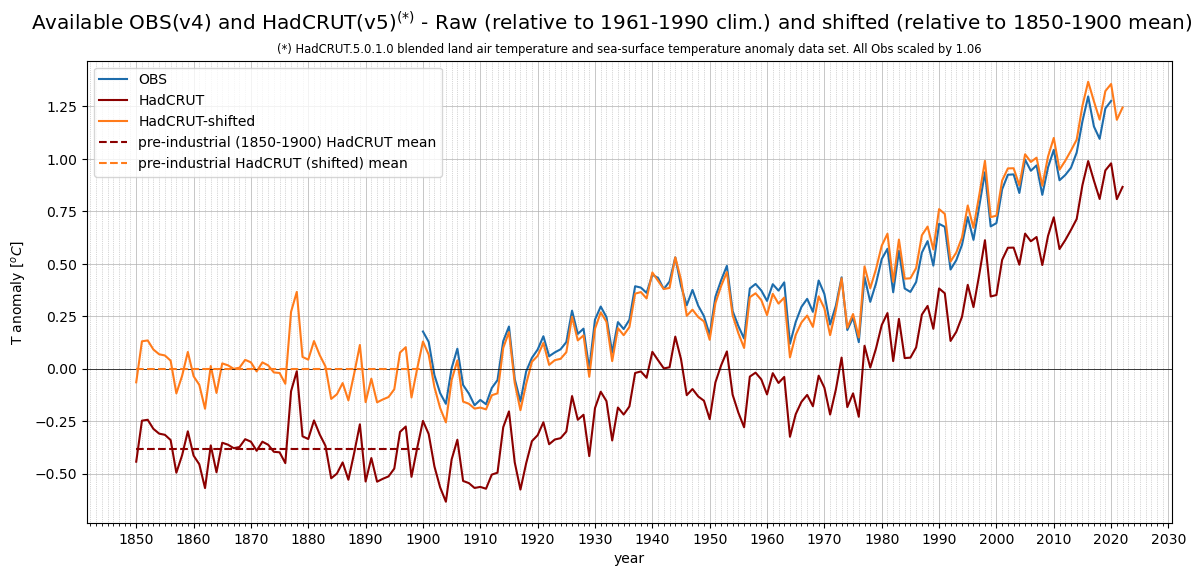

In [13]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#hcshift_col = '#00008b'
#hcshift_col = '#b22222'
hcshift_col = [1.0,0.482,0.106,1]

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=figsize)
obs_df.transpose().plot(ax=ax,c=obs_color)
hadcrutT_df['HadCRUT'].plot(ax=ax,c=hadcrut_col)
hadcrutshiftT_df['HadCRUT-shifted'].plot(ax=ax,c=hcshift_col)

# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 

ax.plot(preindustrial_lapse, [hadcrut_mean_preindustrial,hadcrut_mean_preindustrial], c=hadcrut_col, lw=1.5, ls='--', label='pre-industrial (1850-1900) HadCRUT mean')
ax.plot(preindustrial_lapse, [0,0], c=hcshift_col, lw=1.5, ls='--', label='pre-industrial HadCRUT (shifted) mean')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(True, which='major', linestyle='-', linewidth=0.5) #{'major', 'minor', 'both'})
ax.grid(True, which='minor', linestyle=':', linewidth=0.5) #{'major', 'minor', 'both'})

ax.legend()

sub_title_lbl = f"(*) {hadcrut_ds.attrs['title']}"
if obs_scale_flg :
    sub_title_lbl += ". All Obs scaled by 1.06"
title_lbl = "Available OBS(v4) and HadCRUT(v5)$^{(*)}$ - Raw (relative to 1961-1990 clim.) and shifted (relative to 1850-1900 mean)"

ax.set_title(sub_title_lbl,fontsize='small')#,horizontalalignment='left',x=0.01)
plt.suptitle(title_lbl,y=0.965,size="x-large")

#ax.set_title(f"(*) {hadcrut_ds.attrs['title']}",fontsize='small')#,horizontalalignment='left',x=0.01)
#plt.suptitle("Available OBS(v4) and HadCRUT(v5)$^{(*)}$ raw and shifted data plotted in time",y=0.965,size="x-large")

ax.set_xlabel('year')
ax.set_ylabel('T anomaly [$^oC$]')

if y_lim is not None :
    ax.set_ylim(y_lim)

print('YLim:',ax.get_ylim())
# YLim: (-0.6886144006008413, 1.3145509254647352)
# YLim: (-0.691910967198876, 1.3837788240234634)
# YLim: (-0.7299312646368918, 1.3934239809926194)
# YLim: (-0.7334256252308086, 1.4668055534648712)


figs_filename = os.path.join(figs_dir, 'OBS_and_HadCRUT_shifed_data'+'.'+fig_ext)
if obs_scale_flg :
    figs_filename +=  "-1.06-rescaled"
else:
    figs_filename +=  "-no-rescaled"
figs_filename += '.'+fig_ext

print(f"Saving figure in file {figs_filename} ...")
plt.savefig(figs_filename, **figs_defaults)

YLim: (-0.7334256252308086, 1.4668055534648712)
Saving figure in file Figs/OBS-HadCRUT_and_HadCRUT200_shifed_data.png-1.06-rescaled.png ...


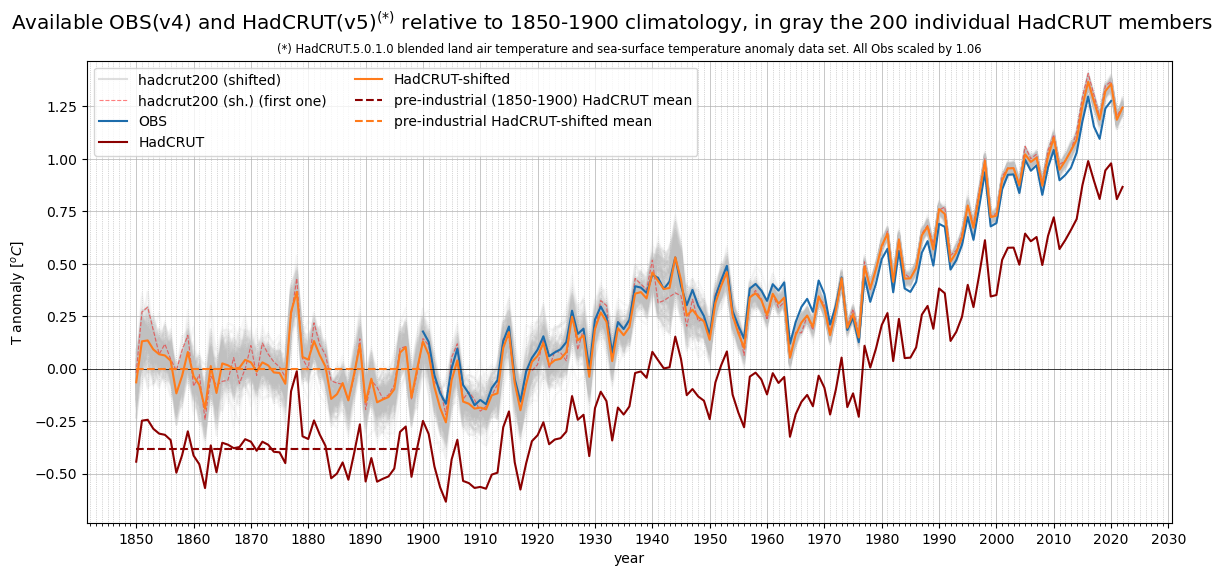

In [14]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#hcshift_col = '#00008b'
#hcshift_col = '#b22222'
hcshift_col = [1.0,0.482,0.106,1]

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=figsize)
for i_profil in np.arange(hadcrut200shift_df.shape[0]):
    if i_profil == 0:
        hadcrut200shift_df.iloc[i_profil,:].plot(ax=ax,c='#c0c0c0',alpha=0.5, label='hadcrut200 (shifted)')
    hadcrut200shift_df.iloc[i_profil,:].plot(ax=ax,c='#c0c0c0',alpha=0.1, label='_nolegend_')
hadcrut200shift_df.iloc[0,:].plot(ax=ax, c='#ff0000', alpha=0.5, ls='--',lw=0.8, label='hadcrut200 (sh.) (first one)')

obs_df.transpose().plot(ax=ax,c=obs_color)
hadcrutT_df['HadCRUT'].plot(ax=ax,c=hadcrut_col)
hadcrutshiftT_df['HadCRUT-shifted'].plot(ax=ax,c=hcshift_col)

# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 

ax.plot(preindustrial_lapse, [hadcrut_mean_preindustrial,hadcrut_mean_preindustrial], c=hadcrut_col, lw=1.5, ls='--', label='pre-industrial (1850-1900) HadCRUT mean')
ax.plot(preindustrial_lapse, [0,0], c=hcshift_col, lw=1.5, ls='--', label='pre-industrial HadCRUT-shifted mean')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(True, which='major', linestyle='-', linewidth=0.5) #{'major', 'minor', 'both'})
ax.grid(True, which='minor', linestyle=':', linewidth=0.5) #{'major', 'minor', 'both'})

ax.legend(ncol=2)

sub_title_lbl = f"(*) {hadcrut_ds.attrs['title']}"
if obs_scale_flg :
    sub_title_lbl += ". All Obs scaled by 1.06"
title_lbl = "Available OBS(v4) and HadCRUT(v5)$^{(*)}$ relative to 1850-1900 climatology, in gray the 200 individual HadCRUT members"

ax.set_title(sub_title_lbl,fontsize='small')#,horizontalalignment='left',x=0.01)
plt.suptitle(title_lbl,y=0.965,size="x-large")

#ax.set_title(f"(*) {hadcrut_ds.attrs['title']}",fontsize='small')#,horizontalalignment='left',x=0.01)
#plt.suptitle("Available OBS(v4) and HadCRUT(v5)$^{(*)}$ raw and shifted data plotted in time",y=0.965,size="x-large")

ax.set_xlabel('year')
ax.set_ylabel('T anomaly [$^oC$]')

if y_lim is not None :
    ax.set_ylim(y_lim)

print('YLim:',ax.get_ylim())
# YLim: (-0.6886144006008413, 1.3145509254647352)
# YLim: (-0.691910967198876, 1.3837788240234634)
# YLim: (-0.7299312646368918, 1.3934239809926194)
# YLim: (-0.7334256252308086, 1.4668055534648712)


figs_filename = os.path.join(figs_dir, 'OBS-HadCRUT_and_HadCRUT200_shifed_data'+'.'+fig_ext)
if obs_scale_flg :
    figs_filename +=  "-1.06-rescaled"
else:
    figs_filename +=  "-no-rescaled"
figs_filename += '.'+fig_ext

print(f"Saving figure in file {figs_filename} ...")
plt.savefig(figs_filename, **figs_defaults)

YLim: (-0.7334256252308086, 1.4668055534648712)
Saving figure in file Figs/OBS-HadCRUT_and_HadCRUT+AR1{n_grey}_shifed_data.png-1.06-rescaled.png ...


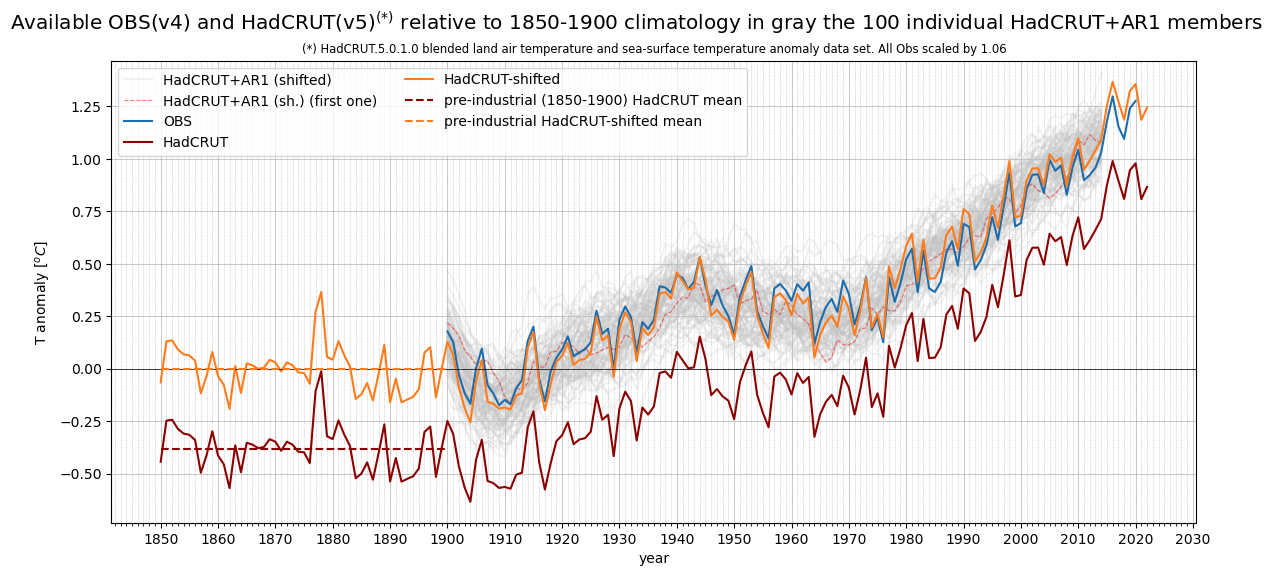

In [15]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#hcshift_col = '#00008b'
#hcshift_col = '#b22222'
hcshift_col = [1.0,0.482,0.106,1]

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=figsize)

#for i_profil in np.arange(hadcrut200shift_df.shape[0]):
#    hadcrut200shift_df.iloc[i_profil,:].plot(ax=ax,c='#c0c0c0',alpha=0.1, label='_nolegend_')

for i_profil in np.arange(hadcrutAR1shift_df.shape[0]):
    if i_profil == 0:
        hadcrutAR1shift_df.iloc[i_profil,:].plot(ax=ax,c='#c0c0c0',alpha=0.2, label='HadCRUT+AR1 (shifted)')
    hadcrutAR1shift_df.iloc[i_profil,:].plot(ax=ax,c='#c0c0c0',alpha=0.2, label='_nolegend_')
hadcrutAR1shift_df.iloc[0,:].plot(ax=ax, c='#ff0000', alpha=0.5, ls='--',lw=0.8, label='HadCRUT+AR1 (sh.) (first one)')

n_grey,sz_grey = hadcrutAR1shift_df.shape

obs_df.transpose().plot(ax=ax,c=obs_color)
hadcrutT_df['HadCRUT'].plot(ax=ax,c=hadcrut_col)
hadcrutshiftT_df['HadCRUT-shifted'].plot(ax=ax,c=hcshift_col)

# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 

ax.plot(preindustrial_lapse, [hadcrut_mean_preindustrial,hadcrut_mean_preindustrial], c=hadcrut_col, lw=1.5, ls='--', label='pre-industrial (1850-1900) HadCRUT mean')
ax.plot(preindustrial_lapse, [0,0], c=hcshift_col, lw=1.5, ls='--', label='pre-industrial HadCRUT-shifted mean')

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(True, which='major', linestyle='-', linewidth=0.5) #{'major', 'minor', 'both'})
ax.grid(True, which='minor', linestyle=':', linewidth=0.5) #{'major', 'minor', 'both'})

ax.legend(ncol=2)

sub_title_lbl = f"(*) {hadcrut_ds.attrs['title']}"
if obs_scale_flg :
    sub_title_lbl += ". All Obs scaled by 1.06"
title_lbl = "Available OBS(v4) and HadCRUT(v5)$^{(*)}$ relative to 1850-1900 climatology"+f" in gray the {n_grey} individual HadCRUT+AR1 members"

ax.set_title(sub_title_lbl,fontsize='small')#,horizontalalignment='left',x=0.01)
plt.suptitle(title_lbl,y=0.965,size="x-large")

#ax.set_title(f"(*) {hadcrut_ds.attrs['title']}",fontsize='small')#,horizontalalignment='left',x=0.01)
#plt.suptitle("Available OBS(v4) and HadCRUT(v5)$^{(*)}$ raw and shifted data plotted in time",y=0.965,size="x-large")

ax.set_xlabel('year')
ax.set_ylabel('T anomaly [$^oC$]')

if y_lim is not None :
    ax.set_ylim(y_lim)

print('YLim:',ax.get_ylim())
# YLim: (-0.6886144006008413, 1.3145509254647352)
# YLim: (-0.691910967198876, 1.3837788240234634)
# YLim: (-0.7299312646368918, 1.3934239809926194)
# YLim: (-0.7334256252308086, 1.4668055534648712)


figs_filename = os.path.join(figs_dir, 'OBS-HadCRUT_and_HadCRUT+AR1{n_grey}_shifed_data'+'.'+fig_ext)
if obs_scale_flg :
    figs_filename +=  "-1.06-rescaled"
else:
    figs_filename +=  "-no-rescaled"
figs_filename += '.'+fig_ext

print(f"Saving figure in file {figs_filename} ...")
plt.savefig(figs_filename, **figs_defaults)

___
## _Load HadCRUT v.5 - Multiple monthly series_

HadCRUT v5 Multiple monthly series data
Last time step: 2022-10-16T12:00:00.000000000


<xarray.Dataset>
Dimensions:         (realization: 200, time: 2074, bnds: 2)
Coordinates:
  * realization     (realization) int64 1 2 3 4 5 6 ... 195 196 197 198 199 200
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2022-10-16T...
    latitude        float64 ...
    longitude       float64 ...
Dimensions without coordinates: bnds
Data variables:
    tas             (realization, time) float64 -0.6481 -0.1987 ... 0.9389
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (bnds) float64 ...
    longitude_bnds  (bnds) float64 ...
    coverage_unc    (time) float64 ...
    area_fraction   (time) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-11-24T16:34:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

Text(0.5, 0, 'periods of observation (months)')

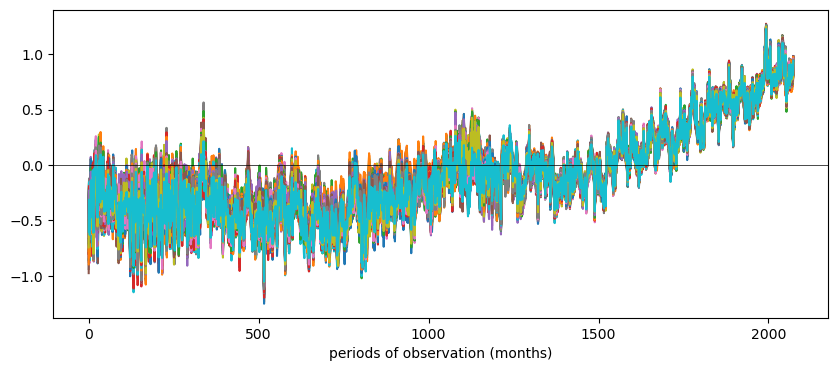

In [16]:
print("HadCRUT v5 Multiple monthly series data")
hadcrutm_ds = xr.open_dataset(os.path.join(data_dir,hadcrut_multi_filename))

print(f"Last time step: {hadcrutm_ds['time'].isel(time=-1).values}")

# extraction de l'array de données qui nous interesent: les moyennes des anomalies de temperature, `tas_mean`
hadcrutm__obs_Tarr = hadcrutm_ds['tas'].values.T

display(hadcrutm_ds)

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,4))
ax.plot(hadcrutm__obs_Tarr, label='HadCRUT200');
# ligne a y = zero
xlim=ax.get_xlim(); ax.hlines(0,xmin=xlim[0],xmax=xlim[1],color='k',lw=0.5); ax.set_xlim(xlim); 
obs_arr.shape
ax.set_xlabel('periods of observation (months)')
#ax.legend(loc=2)